<a href="https://colab.research.google.com/github/VeronikaBastiuchenko/All_hw_Python.ipynb/blob/main/HW_11_3_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%BD%D1%96_%D0%B2%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%97_%D0%B7_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('//content/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [6]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

/tmp/ipython-input-3351587373.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


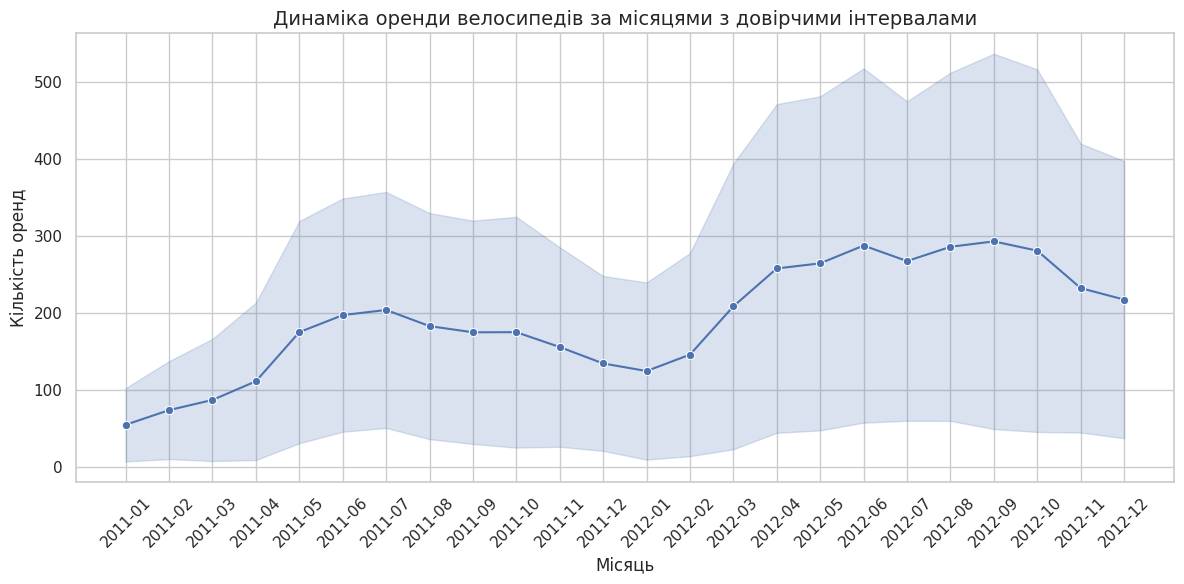

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='month_year',
    y='count',
    ci='sd',
    marker='o'
)

plt.title('Динаміка оренди велосипедів за місяцями з довірчими інтервалами', fontsize=14)
plt.xlabel('Місяць')
plt.ylabel('Кількість оренд')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

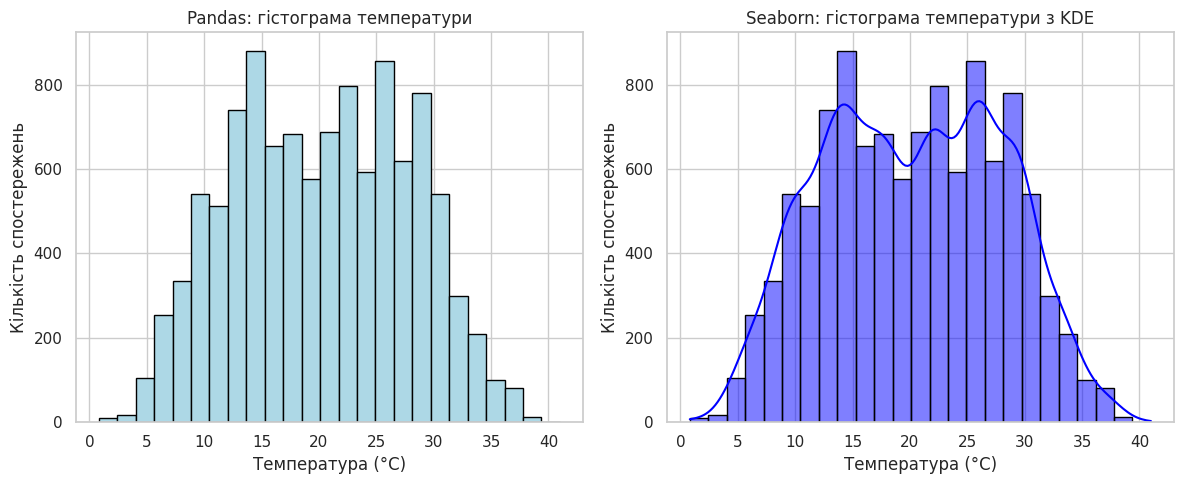

In [11]:
plt.figure(figsize=(12, 5))

# Гістограма з Pandas
plt.subplot(1, 2, 1)
df['temp'].plot(kind='hist', bins=25, color='lightblue', edgecolor='black')
plt.title('Pandas: гістограма температури')
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість спостережень')

# Гістограма з Seaborn
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='temp', bins=25, kde=True, color='blue', edgecolor='black')
plt.title('Seaborn: гістограма температури з KDE')
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість спостережень')

plt.tight_layout()
plt.show()

Pandas дає простішу гістограму - лише стовпчики.Seaborn має кращий стиль (м’які кольори, відступи, сітка) і додатково малює гладку лінію поверх стовпчиків.

Лінія це крива KDE (Kernel Density Estimate), тобто оцінка щільності розподілу.Вона показує, як ймовірно розподілена температура у вибірці. Іншими словами, це “плавна версія” гістограми, яка допомагає побачити форму розподілу (симетрію, піки, тощо).

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

/tmp/ipython-input-2541916341.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='weather_label', y='count', palette='pastel', ax=axes[1])


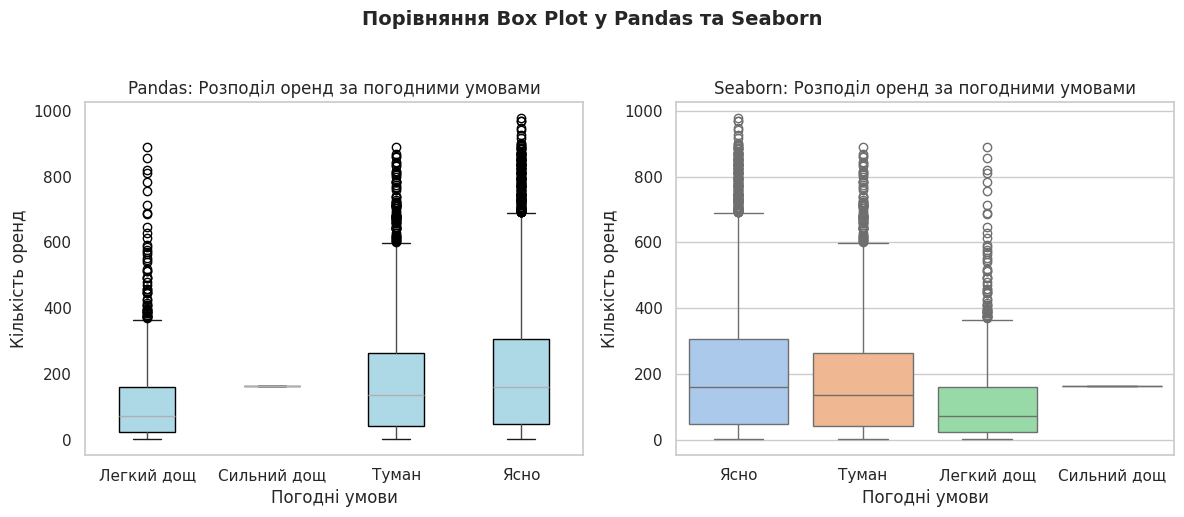

In [18]:
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
df['weather_label'] = df['weather'].map(weather_labels)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pandas Boxplot
df.boxplot(column='count', by='weather_label', ax=axes[0],
           grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue'))
axes[0].set_title('Pandas: Розподіл оренд за погодними умовами')
axes[0].set_xlabel('Погодні умови')
axes[0].set_ylabel('Кількість оренд')

# Seaborn Boxplot
sns.boxplot(data=df, x='weather_label', y='count', palette='pastel', ax=axes[1])
axes[1].set_title('Seaborn: Розподіл оренд за погодними умовами')
axes[1].set_xlabel('Погодні умови')
axes[1].set_ylabel('Кількість оренд')


plt.suptitle('Порівняння Box Plot у Pandas та Seaborn', fontsize=14, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()

Pandas показує базовий boxplot без стильових покращень — графік виглядає простіше. Seaborn автоматично додає приємні кольори, тіні, ширші коробки, і гарно оформлені осі.


<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


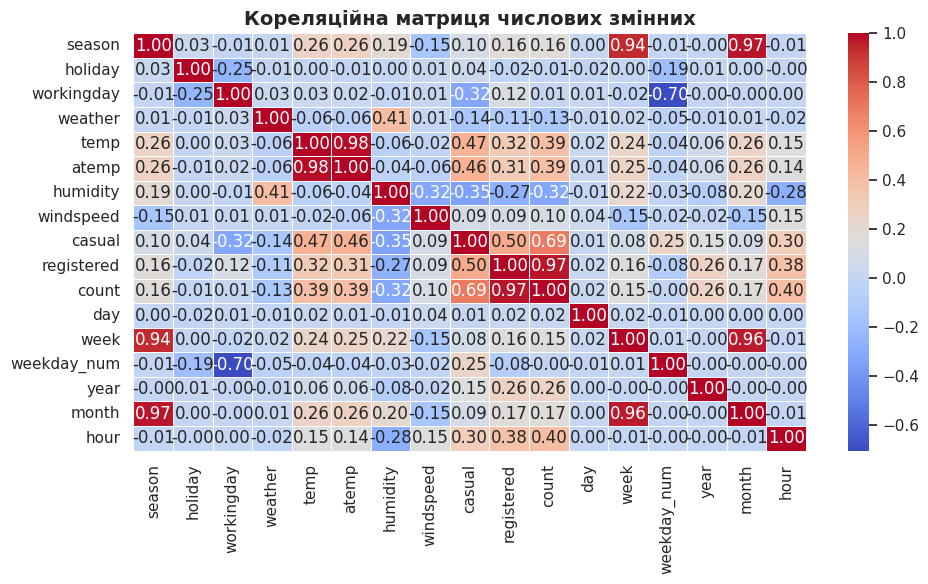

In [13]:
num_cols = df.select_dtypes(include=['number'])

corr = num_cols.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title('Кореляційна матриця числових змінних', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

1.	Які змінні найсильніше корелюють із count (загальна кількість оренд): Найвища позитивна кореляція зазвичай із temp і atemp
(тобто, чим тепліше — тим більше оренд).
2.	Яка кореляція між temp та atemp: Дуже висока, майже 1.00, тому що “atemp” — це “як відчувається температура”,
і вона обчислюється з реальної температури, отже вони тісно пов’язані.
3.	Які змінні мають негативну кореляцію: Найчастіше це humidity (вологість) і windspeed (швидкість вітру).
Коли висока вологість або сильний вітер — оренд стає менше.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


/tmp/ipython-input-3956296414.py:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


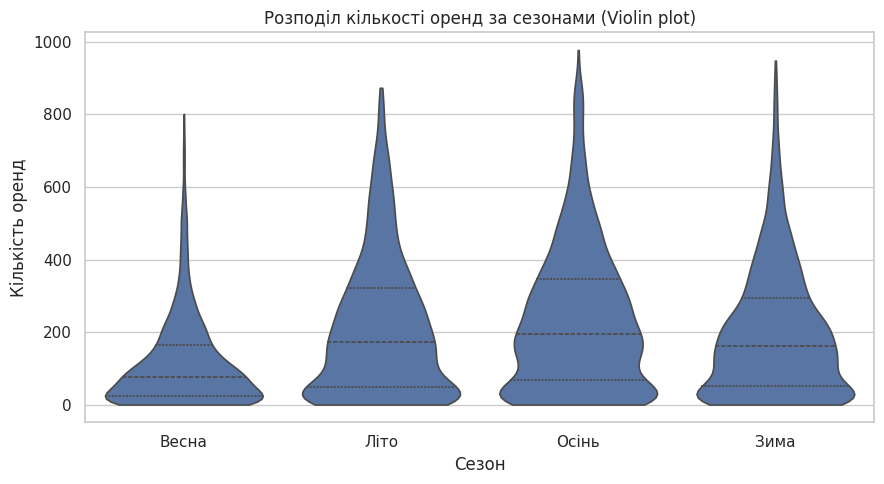

In [14]:
season_map = {1:'Весна', 2:'Літо', 3:'Осінь', 4:'Зима'}
if 'season_label' not in df.columns:
    df['season_label'] = df['season'].map(season_map)

plt.figure(figsize=(9,5))
sns.violinplot(
    data=df,
    x='season_label', y='count',
    inner='quartile',
    cut=0,
    scale='width'
)
plt.title('Розподіл кількості оренд за сезонами (Violin plot)')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')
plt.tight_layout()
plt.show()

Товщина “скрипки” = щільність спостережень (де ширше — там більше значень). Найбільша варіабельність там, де скрипка довша (великий діапазон) і ширша у багатьох місцях; зазвичай це теплі сезони (часто літо/осінь).
Перевага над box plot: видно форму розподілу (мульти-піки, асиметрію), а не лише медіану/квартилі.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

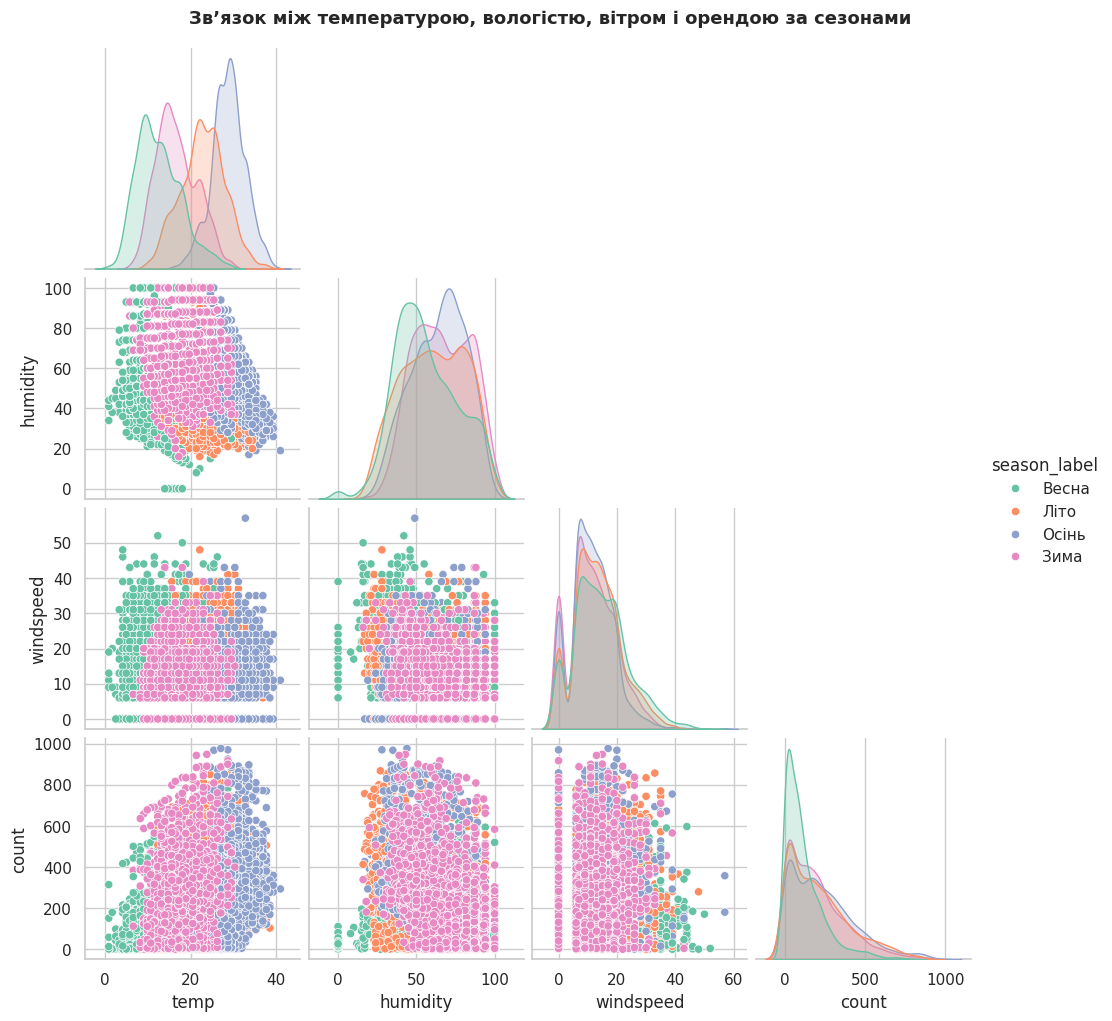

In [19]:
sns.set(style="whitegrid")

vars_ = ['temp', 'humidity', 'windspeed', 'count']

sns.pairplot(
    data=df,
    vars=vars_,
    hue='season_label',
    palette='Set2',
    diag_kind='kde',
    corner=True
)

plt.suptitle('Зв’язок між температурою, вологістю, вітром і орендою за сезонами',
             y=1.02, fontsize=13, fontweight='bold')
plt.show()

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

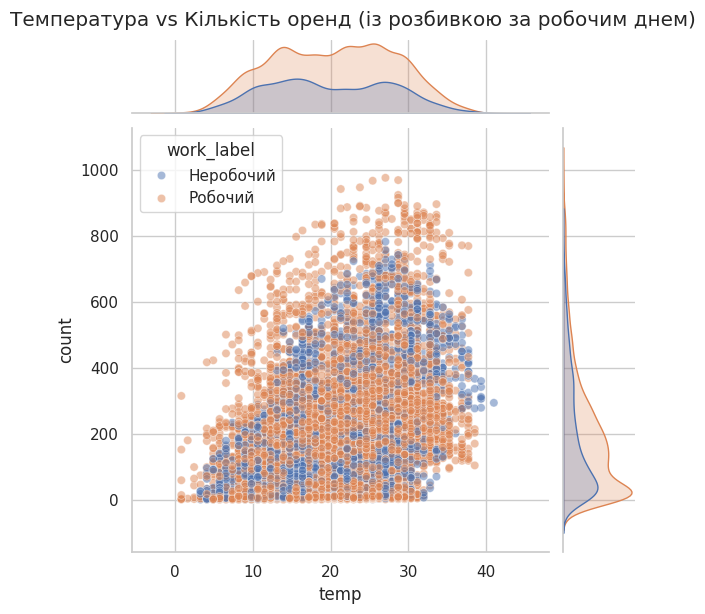

In [17]:
work_map = {0:'Неробочий', 1:'Робочий'}
if 'work_label' not in df.columns:
    df['work_label'] = df['workingday'].map(work_map)

g = sns.jointplot(
    data=df,
    x='temp', y='count',
    hue='work_label',
    kind='scatter',
    height=6,
    alpha=0.5
)
g.fig.suptitle('Температура vs Кількість оренд (із розбивкою за робочим днем)', y=1.02)
plt.show()

Графіки по краях (маргінальні) показують окремі розподіли temp і count для кожної категорії (робочий/неробочий).Різниця у поведінці: зазвичай у робочі дні при помірних температурах більше поїздок (комʼютинг), а у вихідні розподіл може бути рівнішим або зміщеним (більше дозвілля, інші години).